<h1>Molekylorbitaler</h1>

Før vi kan starte må vi laste inn og konfigurere en del software-pakker.

## Configuration

Set up a `local` computation setting with a dedicated work directory to store all inputs and outputs. This step is done in order to avoid clogging up the `./` default path. (Note that "local" here means to use the NIRD toolkit resources, not some external machine).

In [1]:
import hylleraas as hsp
import os

work_dir=os.path.realpath('./')+'/talent2024'
local_env = hsp.create_compute_settings('local', work_dir=work_dir, debug=True)

Setting up a computational method

In [2]:
dalton_geo = hsp.Method({'qcmethod': ['DFT', 'BLYP'],
                          'basis': 'pcseg-1',
                          'properties': ['geometry_optimization']}, program='dalton', compute_settings=local_env)

dalton_vib = hsp.Method({'qcmethod': ['DFT', 'BLYP'],
                          'basis': 'pcseg-1',
                          'properties': ['analytical_hessian']}, program='dalton', compute_settings=local_env)


Setting up some auxiliary functions

In [3]:
def print_all(obj):
    for prop in dir(obj):
        if prop.startswith('_'):
            continue
        try:
            val = getattr(obj, prop)
        except Exception:
            continue
        print(f'\n{prop}: {val}')
              
            
class MOs:
    def __init__(self, mos, units=None):
        self.mos = mos
        if not units:
            self.mos.units = hsp.Units('angstrom')
        
    def view(self, no):
        return self.mos.generate_orbital(no)
              
def generate_orbitals(molecule,
                      orbital_coefficients,
                      basis='pcseg-1'):
    mos = hsp.Orbital(basis=basis, molecule=molecule, orbital=orbital_coefficients, options = {'ordering' : 'row'})
    return MOs(mos)

def generate_spectrum(molecule, hessian):
    from daltonproject import vibrational_analysis
    spectrum = vibrational_analysis(molecule=molecule, hessian=hessian)
    return {'frequencies': spectrum.frequencies, 'vibrational_modes': spectrum.cartesian_displacements}
                      



<h2>Lage et molekyl</h2>

Vi spesifiserer her en molekyl ved hjelp av en SMILES (simplified molecular-input line-entry system). Det er en tekstrepresentasjon som, med litt ekstra bakgrunnsinformasjon om typiske bindningslenger etc., kan oversettes til koordinater for alle atomer i molekylet.

In [4]:
my_molecule = hsp.Molecule("C#C")
print("--- Molecular geometry generated from Smiles string in default Angstrom units.")
print(my_molecule.xyz_string)

hsp.view_molecule(my_molecule);


--- Molecular geometry generated from Smiles string in default Angstrom units.
4

C -0.590038000000 0.288851000000 0.053568000000
C 0.597879000000 0.093920000000 -0.048099000000
H -1.648205000000 0.461643000000 0.140756000000
H 1.640364000000 -0.074252000000 -0.146225000000



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<h2>Visualisering av molekylorbitaler</h2>

In [8]:
dalton_en = hsp.Method({'qcmethod': ['DFT', 'BLYP'],
                          'basis': 'pcseg-1',
                          'properties': ['energy']}, program='dalton', compute_settings=local_env)
my_molecule_en = dalton_en.run(my_molecule)
#mol_orb = hsp.Orbital(basis='pcseg-1', molecule=my_molecule, orbital=my_molecule_en.orbital_coefficients, options = {'ordering' : 'row'})
mol_orb = hsp.Orbital(basis='pcseg-1', molecule=my_molecule, orbital=my_molecule_en.orbital_coefficients, options = {'ordering' : 'row'})
mol_orb.units = hsp.Units('angstrom')

2024-01-17 01:07:34 CET - INFO: Output files already exist and will be reused.


In [6]:
#mol_orb = generate_orbitals(molecule=my_molecule, orbital_coefficients=my_molecule_en.orbital_coefficients)

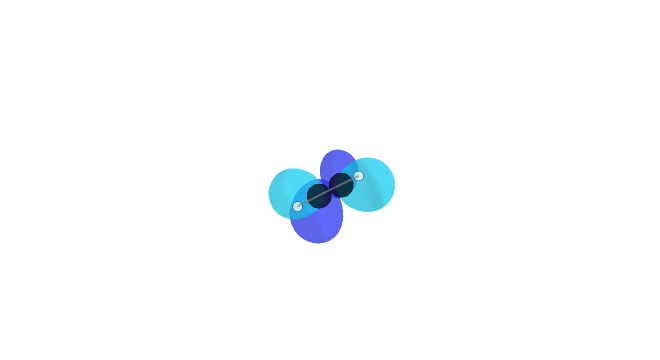

In [18]:
#mol_orb.view(3)
mol_orb.generate_orbital(8, options = {'resolution':5})